In [169]:
!pip install nltk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [170]:
from datasets import load_dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
import nltk

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [171]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/kyh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/kyh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [172]:
def count_sentences(text):
    sentences = nltk.sent_tokenize(text)
    
    count = len(sentences)
    return count

text1 = "A philosophical basis of Franklin D. Roosevelt's New Deal was the idea of relief. It changed America." # 2문장
text2 = "A philosophical basis of Franklin D. Roosevelt's New Deal was the" # 1문장 (미완성)

if count_sentences(text2) >= 2:
    print("결과: 이 텍스트는 여러 문장입니다. (O)")
else:
    print("결과: 한문장입니다. (X)")

결과: 한문장입니다. (X)


In [173]:
model_name = "Qwen/Qwen3-8B" 
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [174]:
dataset = load_dataset("UniqueData/sat-questions-and-answers-for-llm")

In [175]:
print(dataset)
df = dataset['train'].to_pandas()

DatasetDict({
    train: Dataset({
        features: ['id', 'subject', 'prompt', 'A', 'B', 'C', 'D', 'E', 'answer'],
        num_rows: 1380
    })
})


In [176]:
subject_counts = df['subject'].value_counts()
print(subject_counts)

subject
us_history       1108
world_history     272
Name: count, dtype: int64


In [177]:
def calculate_tokens(text):
    return len(tokenizer.encode(text))

In [178]:
# 'prompt' 컬럼이 비어있는 행 제거
df = df.dropna(subset=['prompt'])

# 빈 문자열 제거
df = df[df['prompt'] != ""]

# 토큰
df['token_len'] = df['prompt'].astype(str).apply(lambda x: len(tokenizer.encode(x)))

display(df[['prompt', 'token_len']].head())

,prompt,token_len
0,Sumer and Egypt were similar in all of the following ways EXCEPT,14
1,A follower of the Chinese philosophy of Daoism would MOST agree with which statement?,16
2,Which of these was NOT a characteristic of early humans in the Paleolithic Age?,16
3,Buddhism was founded in part as a response to questions about which faith?,17
4,The Kush city of Meroe rose to prominence mainly because of its natural supply of,17


In [179]:
long_data = df[df['token_len'] > 2048]
len(long_data)

0

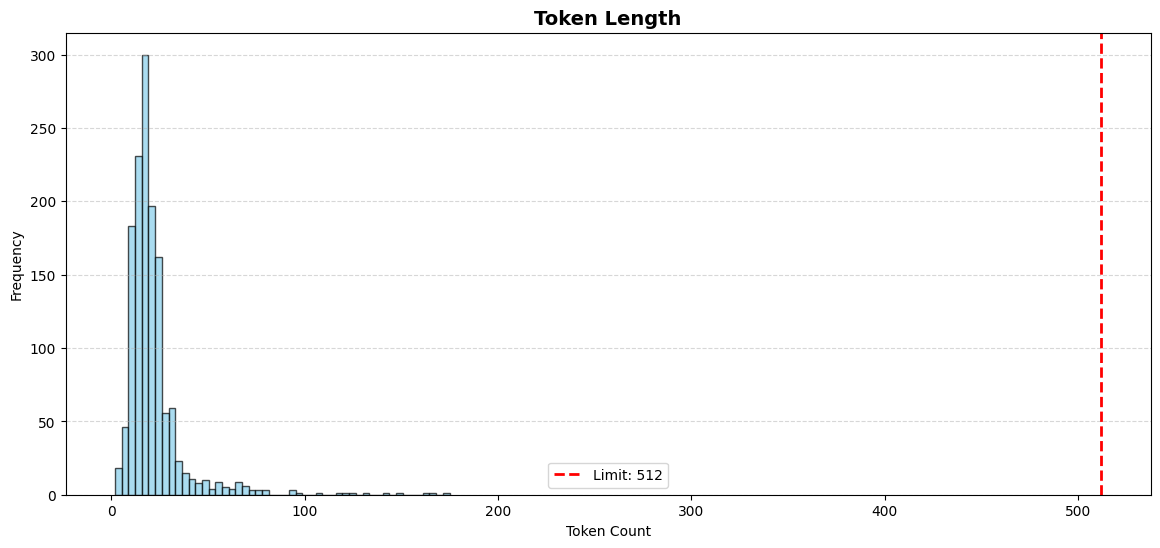

count    1379.000000
mean       21.572879
std        15.738691
min         2.000000
25%        14.000000
50%        18.000000
75%        24.000000
max       175.000000
Name: token_len, dtype: float64


In [180]:
plt.figure(figsize=(14, 6))
plt.hist(df['token_len'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Token Length', fontsize=14, fontweight='bold')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', alpha=0.5) 

plt.axvline(x=512, color='red', linestyle='--', linewidth=2, label='Limit: 512')
plt.legend()

plt.show()

print(df['token_len'].describe())

In [181]:
# 랜덤 다섯개
random = df.sample(n=10)
display(random)

,id,subject,prompt,A,B,C,D,E,answer,token_len
588,330,us_history,"This man, although he many not actually have com mitted the crime attributed to him, is nevertheless morally culpable, because he is an enemy of our existing institutions. Which of the following was sent to his death by the judge who spoke these words at his trial?",Julius Rosenberg,Bartolomeo Vanzetti,Charles Guiteau,Edward Slovik,Lee Harvey Oswald,B,54
1041,799,us_history,Which statement explains why gay rights organizations opposed the policy adopted during the Clinton administration regarding gays in the military?,It prohibited gays from serving in the military.,It prohibited gays from serving in combat.,It provided for segregation of gay troops.,Its frank acceptance of gay soldiers endangered public support.,It did not protect openly gay soldiers from discrimination.,E,21
398,128,us_history,The first U.S. military response to a suspected terrorist act came in 1986 when President Ronald Reagan ordered a bombing attack on which country?,Syria,Pakistan,Turkey,Uganda,Libya,E,32
1242,1008,us_history,A fundamental cause of the urban riots that broke out in many cities during the Lyndon Johnson administration was,the rising expectations of African Americans for an improved quality of life.,despair of the poor and minorities over the draft for Vietnam.,frustration of African Americans over the slow pace of change in the South regarding segregation.,anger over the inability of African Americans in the North to vote.,a growing feeling among African Americans that affirmative action would never be implemented.,A,20
152,160,world_history,Which of the following was a significant change instituted during the reign of the 'Abbāsid Empire?,Non-Arab Muslims were allowed to hold civil and military office.,The Islamic capital was moved from Mecca to Damascus.,A hereditary method of succession was put in place.,Islam was divided into the major sects of Sunni and Shia.,The Byzantine capital of Constantinople was conquered.,A,20
541,280,us_history,Which source would give a historian the most accurate information about race relations in the Mississippi Valley in the years after the Civil War?,A copy of The Adventures of Huckleberry Finn by Mark Twain,The song lyrics of Stephen Foster,The diary of the governor of Arkansas during that period,Tax rolls of the region,Records of local and state laws of the region,E,25
610,355,us_history,The Virginia Statute of Religious Freedom of 1779 stated that,government control over religious beliefs or worship was tyrannical,the Episcopal Church was the state church of Virginia,Protestants were free to pray at public governmental functions,British subjects could worship with Americans,Christians were finally free to express their religious beliefs in public,A,15
48,50,world_history,What was Sigmund Freud's intent with his breakthrough publication Die Traumdeutung?,Reconciling taboo desires,Interpreting the meaning of dreams,Exploring societal and gender roles,Debunking theories of hypnosis,Treating emotional hysteria,B.,19
1108,868,us_history,"The ""War on Poverty"" was an attempt by",President Richard Nixon to aid Latin American nations.,President Lyndon Johnson to end hunger and economic hardship in the United States.,President John F. Kennedy to aid the developing world by organizing the Peace Corps.,George Marshall to feed the people of Europe after World War II.,President Dwight Eisenhower to reduce the number of people on welfare.,B,10
220,230,world_history,Which of these was NOT true of the Han dynasty?,It engaged in extensive trade with Europe.,It introduced the civil service examination.,It began early construction on the Great Wall.,It created roads and canals to improve transportation.,It funded bureaucracy and army through taxes.,C,11


In [182]:
# 가장 토큰 긴
longest = df.nlargest(1, 'token_len')
display(longest)
longest.info()

,id,subject,prompt,A,B,C,D,E,answer,token_len
977,731,us_history,"I. ""The Kansas-Nebraska Act authorizes the further extension of slavery and we have, do now, and will continue to protest most emphatically against … slavery."" (1854) II. ""The territories were the common property of the several states. As a joint agent of the states, Congress has no power to deny the citizens of any state the right to take their property into a territory… Therefore slavery is legal in the territories. If Wilmot carries, woe, woe I say to the union."" (1850) III. ""We beg the slave owners to pause before they proceed further to disturb the peace we had hoped the Compromise of 1850 would have made perpetual."" (1854) Which of the above statement(s) would John C. Calhoun have supported?",I,II,III,I and III,II and III,B,175


<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 977 to 977
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1 non-null      int64 
 1   subject    1 non-null      object
 2   prompt     1 non-null      object
 3   A          1 non-null      object
 4   B          1 non-null      object
 5   C          1 non-null      object
 6   D          1 non-null      object
 7   E          1 non-null      object
 8   answer     1 non-null      object
 9   token_len  1 non-null      int64 
dtypes: int64(2), object(8)
memory usage: 88.0+ bytes


In [183]:
# 가장 긴 문제 (prompt) -> 한국어 번역 -> 토큰 길이 확인
prompt_text = """I. "캔자스-네브래스카 법은 노예제의 추가 확대를 승인하고 있으며, 우리는 노예제에 대해 과거에도 그랬고 현재도 그러하며, 앞으로도 가장 강력하게 반대할 것이다." (1854년)II. "준주(Territories)는 여러 주(States)의 공동 자산이다. 주들의 공동 대리인으로서, 의회는 그 어떤 주의 시민에게도 자신의 재산을 준주로 가져갈 권리를 거부할 권한이 없다... 따라서 노예제는 준주에서 합법이다. 만약 윌모트 조항이 통과된다면, 연방(Union)에 재앙이, 재앙이 닥칠 것이라고 나는 말한다." (1850년)
III. "우리는 1850년 타협으로 영구적으로 정착되기를 희망했던 그 평화를 노예 소유주들이 더 이상 깨뜨리기 전에 멈춰줄 것을 간청한다." (1854년)
존 C. 칼훈(John C. Calhoun)이라면 위 진술 중 어느 것을 지지했겠는가?"""
token_len = len(tokenizer.encode(prompt_text))
print(f"Token Length: {token_len}")

Token Length: 271


In [184]:
df['A_len'] = df['A'].astype(str).apply(lambda x: len(tokenizer.encode(x)))
df['B_len'] = df['B'].astype(str).apply(lambda x: len(tokenizer.encode(x)))
df['C_len'] = df['C'].astype(str).apply(lambda x: len(tokenizer.encode(x)))
df['D_len'] = df['D'].astype(str).apply(lambda x: len(tokenizer.encode(x)))
df['E_len'] = df['E'].astype(str).apply(lambda x: len(tokenizer.encode(x)))

In [185]:
print("A max:", df['A_len'].max())
print("B max:", df['B_len'].max())
print("C max:", df['C_len'].max())
print("D max:", df['D_len'].max())
print("E max:", df['E_len'].max())

A max: 38
B max: 36
C max: 35
D max: 39
E max: 37


In [186]:
df['sentence_count'] = df['prompt'].astype(str).apply(count_sentences)
print(df[['prompt', 'sentence_count']].head())

                                                                                  prompt  \
0                       Sumer and Egypt were similar in all of the following ways EXCEPT   
1  A follower of the Chinese philosophy of Daoism would MOST agree with which statement?   
2        Which of these was NOT a characteristic of early humans in the Paleolithic Age?   
3             Buddhism was founded in part as a response to questions about which faith?   
4      The Kush city of Meroe rose to prominence mainly because of its natural supply of   

   sentence_count  
0               1  
1               1  
2               1  
3               1  
4               1  


In [187]:
multi_sentences = df[df['sentence_count'] >= 2]

In [188]:
one_sentences = df[df['sentence_count'] == 1]

In [197]:
one_sentences.head()

,id,subject,prompt,A,B,C,D,E,answer,token_len,A_len,B_len,C_len,D_len,E_len,sentence_count
0,1,world_history,Sumer and Egypt were similar in all of the following ways EXCEPT,agricultural dependence on the silt left behind by flooding,belief in a polytheistic religion centered on deities of nature,enjoyment of protection from invasion by natural barriers,development of distinct systems of written language,engagement in trade with other nearby cultures,C,14,12,13,10,7,8,1
1,2,world_history,A follower of the Chinese philosophy of Daoism would MOST agree with which statement?,Government intrusiveness should be kept to a minimum.,Government works best when run by well-educated men.,Government should be focused on strengthening the state.,Governments that allow too much freedom are doomed to fail.,Governments have an obligation to suppress independent thought.,A,16,11,10,9,12,10,1
2,3,world_history,Which of these was NOT a characteristic of early humans in the Paleolithic Age?,Ability to make and use simple tools,Tendency to live in permanent settlements,Reliance on hunting and gathering techniques,Propensity for creating artistic cave drawings,Mastery of fire for cooking and heating purposes,B,16,7,7,7,7,9,1
3,4,world_history,Buddhism was founded in part as a response to questions about which faith?,Islam,Daoism,Judaism,Hinduism,Christianity,D,17,1,2,3,4,2,1
4,5,world_history,The Kush city of Meroe rose to prominence mainly because of its natural supply of,salt,iron,gold,grain,silver,B,17,1,1,1,2,1,1


In [189]:
multi_sentences.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 59 to 1364
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              107 non-null    int64 
 1   subject         107 non-null    object
 2   prompt          107 non-null    object
 3   A               107 non-null    object
 4   B               107 non-null    object
 5   C               107 non-null    object
 6   D               107 non-null    object
 7   E               107 non-null    object
 8   answer          107 non-null    object
 9   token_len       107 non-null    int64 
 10  A_len           107 non-null    int64 
 11  B_len           107 non-null    int64 
 12  C_len           107 non-null    int64 
 13  D_len           107 non-null    int64 
 14  E_len           107 non-null    int64 
 15  sentence_count  107 non-null    int64 
dtypes: int64(8), object(8)
memory usage: 14.2+ KB


In [190]:
multi_sentences.head()

,id,subject,prompt,A,B,C,D,E,answer,token_len,A_len,B_len,C_len,D_len,E_len,sentence_count
59,62,world_history,"""Whatsoever therefore is consequent to a time of war, where every man is enemy to every man, the same consequent to the time wherein men live without other security than what their own strength and their own invention shall furnish them withal. In such condition there is…continual fear, and danger of violent death; and the life of man, solitary, poor, nasty, brutish, and short."" The above statement expresses the views of which historical figure?",Thomas Hobbes,John Calvin,Jean-Jacques Rousseau,Niccolò Machiavelli,Thomas Aquinas,A,94,3,2,6,7,3,3
89,92,world_history,"""Respectfulness, without the rules of propriety, becomes laborious bustle; carefulness, without the rules of propriety, becomes timidity; boldness, without the rules of propriety, becomes insubordination; straightforwardness, without the rules of propriety, becomes rudeness."" The above excerpt expresses the viewpoint of",Machiavelli,Socrates,Erasmus,Confucius,Lao Tzu,D,68,4,2,2,3,4,2
98,102,world_history,"""We intend to begin on the first of February unrestricted submarine warfare. We shall endeavor in spite of this to keep the United States of America neutral. In the event of this not succeeding, we make Mexico a proposal of alliance on the following basis: make war together, make peace together, generous financial support and an understanding on our part that Mexico is to reconquer the lost territory in Texas, New Mexico, and Arizona."" In what document did the above excerpt originally appear?",The Communist Manifesto,Final Solution,Five-Year Plan,Zimmermann telegram,Schlieffen Plan,D,94,4,2,3,4,4,4
108,114,world_history,"""O, my brothers, love your Country!…It is only through our country that we can have a recognized collective existence…Let each man among you strive to incarnate his country in himself. Let each man among you regard himself as a guarantor, responsible for his fellow-countrymen, and learn so to govern his actions as to cause his country to be loved and respected through him."" Which theory is best exemplified in this excerpt from the work of Giuseppe Mazzini?",Absolutism,Conservatism,Utilitarianism,Nationalism,Liberalism,D,98,3,3,3,2,3,3
144,151,world_history,"""The heart of the idea of the social contract may be stated simply: Each of us places his person and authority under the supreme direction of the general will, and the group receives each individual as an indivisible part of the whole."" Which of these would be LEAST likely to agree with the statement above?",John Locke,Voltaire,Thomas Hobbes,Montesquieu,Jean-Jacques Rousseau,C,61,2,2,3,4,6,2


In [191]:
multi_sentences

,id,subject,prompt,A,B,C,D,E,answer,token_len,A_len,B_len,C_len,D_len,E_len,sentence_count
59,62,world_history,"""Whatsoever therefore is consequent to a time of war, where every man is enemy to every man, the same consequent to the time wherein men live without other security than what their own strength and their own invention shall furnish them withal. In such condition there is…continual fear, and danger of violent death; and the life of man, solitary, poor, nasty, brutish, and short."" The above statement expresses the views of which historical figure?",Thomas Hobbes,John Calvin,Jean-Jacques Rousseau,Niccolò Machiavelli,Thomas Aquinas,A,94,3,2,6,7,3,3
89,92,world_history,"""Respectfulness, without the rules of propriety, becomes laborious bustle; carefulness, without the rules of propriety, becomes timidity; boldness, without the rules of propriety, becomes insubordination; straightforwardness, without the rules of propriety, becomes rudeness."" The above excerpt expresses the viewpoint of",Machiavelli,Socrates,Erasmus,Confucius,Lao Tzu,D,68,4,2,2,3,4,2
98,102,world_history,"""We intend to begin on the first of February unrestricted submarine warfare. We shall endeavor in spite of this to keep the United States of America neutral. In the event of this not succeeding, we make Mexico a proposal of alliance on the following basis: make war together, make peace together, generous financial support and an understanding on our part that Mexico is to reconquer the lost territory in Texas, New Mexico, and Arizona."" In what document did the above excerpt originally appear?",The Communist Manifesto,Final Solution,Five-Year Plan,Zimmermann telegram,Schlieffen Plan,D,94,4,2,3,4,4,4
108,114,world_history,"""O, my brothers, love your Country!…It is only through our country that we can have a recognized collective existence…Let each man among you strive to incarnate his country in himself. Let each man among you regard himself as a guarantor, responsible for his fellow-countrymen, and learn so to govern his actions as to cause his country to be loved and respected through him."" Which theory is best exemplified in this excerpt from the work of Giuseppe Mazzini?",Absolutism,Conservatism,Utilitarianism,Nationalism,Liberalism,D,98,3,3,3,2,3,3
144,151,world_history,"""The heart of the idea of the social contract may be stated simply: Each of us places his person and authority under the supreme direction of the general will, and the group receives each individual as an indivisible part of the whole."" Which of these would be LEAST likely to agree with the statement above?",John Locke,Voltaire,Thomas Hobbes,Montesquieu,Jean-Jacques Rousseau,C,61,2,2,3,4,6,2
164,173,world_history,"""It is the State which educates its citizens in civic virtue, gives them a consciousness of their mission and welds them into unity."" This quote was most likely spoken by a leader who supported what philosophy of government?",Republicanism,Absolute monarchism,Enlightened despotism,Fascism,Constitutional monarchism,D,43,2,3,6,3,5,2
185,195,world_history,"""Whose government is unostentatious, quite unostentatious, his people will be prosperous, quite prosperous. Whose government is prying, quite prying, his people will be needy, quite needy."" The above quotation reflects the central view of government espoused by which spiritual philosophy?",Confucianism,Buddhism,Legalism,Shintoism,Daoism,E,63,4,4,2,3,2,3
209,219,world_history,"""Wild and blasphemous ideas of God are formed because man has wandered away from the unchangeable laws of science, and the right use of reason; and because something called revealed religion was invented."" The above statement MOST reflects the ideology of which intellectual movement?",Humanism,Materialism,Deism,Utilitarianism,Idealism,C,53,2,2,2,3,2,2
229,239,world_history,"""It has been thought a considerable advance towards establishing the principles of Freedom to say that Government is a compact between those who govern and those who a

In [192]:
small_prompt = filtered_df.nsmallest(14, 'token_len')
display(small_prompt)
small_prompt.info()

,id,subject,prompt,A,B,C,D,E,answer,token_len,A_len,B_len,C_len,D_len,E_len
527,266,us_history,"The cry ""Remember the Maine!"" is associated with the",Mexican War,Civil War,Spanish-American War,First World War,Cuban Missile Crisis,C,11,4,3,4,4,5
966,720,us_history,"According to John Adams, ""The Revolution was effected before the war commenced."" By this he meant",taxation without representation was the real issue that led to the Revolutionary War in 1776.,"the colonists in America had developed a unique character, independent of Great Britain, before the actual revolution took place.",the American colonists had reached a point in their development in which a separation from England was necessary.,the American Revolution was the result of the American policy of salutary neglect.,the Battle of Lexington and Concord had taken place before the signing of the Declaration of Independence.,B,19,21,23,20,16,18
853,604,us_history,The ability to get to the verge without getting into war is the necessary art. The speaker is describing which of the following?,Brinksmanship,Appeasement,Imperialism,Dollar diplomacy,Containment,A,25,5,4,4,4,2
1132,894,us_history,"The 17th Amendment (direct election of U.S. Senators), the initiative, and the recall were all intended to","break up the power of municipal political machines, such as Tammany Hall.",empower the government to challenge big business.,extend civil rights to African Americans.,give the people more power in the democratic process.,relieve the suffering of the poor.,D,25,15,9,7,10,8
389,119,us_history,"In the aftermath of President Kennedy's assassination, a commission was formed to review the evidence and publish a report. The commission was headed by",Vice President Lyndon B. Johnson,Pierre Salinger,Senator J. William Fulbright,Attorney General Robert F. Kennedy,Chief Justice Earl Warren,E,28,8,4,6,7,4
1268,1034,us_history,"The election of 1800 has often been termed the ""Revolution of 1800."" This refers to the fact that it",marked the first election of a non-Virginian to the presidency since the establishment of the Constitution.,was a peaceful transition of the control of the presidency from a Federalist to a Democratic-Republican.,changed the process of electing the president.,resulted in the election of the first non-Christian to the presidency.,was the first election in which the western section of the country was very influential.,B,30,21,20,9,14,16
401,131,us_history,The Fifteenth Amendment tried to ensure the right of black men to vote. The first presidential election after the ratification of the Fifteenth Amendment was in,1864,1920,1860,1960,1872,E,31,4,4,4,4,4
270,284,world_history,"The Chinese ruled over Vietnam between roughly the first andtenth centuries CE. During this period, the Chinese encounteredthe most resistance from the Vietnamese when they attempted to",implement their civil service and bureaucratic systems,introduce the Vietnamese to the Confucian ideology,de-emphasize the role of women in Vietnamese society,employ traditional Chinese agricultural methods,convert the Vietnamese to the Buddhist religion,C,32,7,10,11,5,7
392,122,us_history,"President James Monroe issued the Monroe Doctrine in 1823, warning European powers not to establish new colonies in the western hemisphere. This policy was supported by",Spain,Russia,England,France,Cuba,C,32,1,1,1,1,2
394,124,us_history,Gifford Pinchot is associated with a movement that began in the nineteenth century and focused on protecting the country's natural environment. Thismovement is called the,Greenpeace movement,emancipation movement,enfranchisement movement,conservationist movement,emigration movement,D,33,3,4,6,4,3


<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 527 to 943
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         14 non-null     int64 
 1   subject    14 non-null     object
 2   prompt     14 non-null     object
 3   A          14 non-null     object
 4   B          14 non-null     object
 5   C          14 non-null     object
 6   D          14 non-null     object
 7   E          14 non-null     object
 8   answer     14 non-null     object
 9   token_len  14 non-null     int64 
 10  A_len      14 non-null     int64 
 11  B_len      14 non-null     int64 
 12  C_len      14 non-null     int64 
 13  D_len      14 non-null     int64 
 14  E_len      14 non-null     int64 
dtypes: int64(7), object(8)
memory usage: 1.8+ KB


In [193]:
# train data token 최대 길이 보기
dataset = pd.read_csv('../../data/train.csv') 

# Flatten the JSON dataset
records = []
for _, row in dataset.iterrows():
    problems = literal_eval(row['problems'])
    record = {
        'id': row['id'],
        'paragraph': row['paragraph'],
        'question': problems['question'],
        'choices': problems['choices'],
        'answer': problems.get('answer', None),
        "question_plus": problems.get('question_plus', None),
    }
    # Include 'question_plus' if it exists
    if 'question_plus' in problems:
        record['question_plus'] = problems['question_plus']
    records.append(record)
        
# Convert to DataFrame
train_df = pd.DataFrame(records)

In [194]:
train_df['paragraph_token_len'] = train_df['paragraph'].apply(calculate_tokens)

In [195]:
print(train_df['paragraph_token_len'].describe())

count    2031.000000
mean      532.028065
std       342.805166
min         8.000000
25%       277.000000
50%       507.000000
75%       743.500000
max      1508.000000
Name: paragraph_token_len, dtype: float64


In [198]:
train_df.nsmallest(20, 'paragraph_token_len')

,id,paragraph,question,choices,answer,question_plus,paragraph_token_len
238,generation-for-nlp-718,달러 가치 미국 수출,미국의 금리 하락은 다음 중 달러 가치와 수출에 어떤 변화를 가져오겠습니까?,"[증가 증가, 증가 감소, 감소 증가, 감소 변동 없음]",3,None,8
217,generation-for-nlp-692,재정 정책 통화 정책,다음 중 긴축적 재정 정책과 확장적 통화 정책의 조합을 나타내는 것은 어느 것입니까?,"[세금 인상 국채 매각, 세금 인하 국채 매입, 정부 지출 감소 지급 준비율 증가, 세금 인상 국채 매입]",4,None,10
225,generation-for-nlp-701,재정 정책 통화 정책,다음 중 어떤 재정 및 통화 정책 조합이 경기 침체의 격차를 줄일 가능성이 가장 높습니까?,"[세금 증가. 지급 준비율 증가., 지출 감소. 국채 매각., 세금 감소. 국채 매입., 지출 증가. 지급 준비율 증가.]",3,None,10
248,generation-for-nlp-728,대출 가능한 자금 시장 금리,높은 수준의 소비자 부와 낙관주의는 다음 중 대출 가능한 자금 시장에 어떤 변화를 가져올 것 같습니까?,"[공급 증가 인상, 수요 증가 매입 인상, 수요 감소 인하, 공급 감소 인상]",4,None,11
676,generation-for-nlp-1239,인구조사 자료와 소련 교육부,다음 중 위 차트에 표시된 정보가 가장 잘 이해되는 역사적 맥락은?,"[근대의 교육 개혁, 중앙화 및 국가 주도의 근대화 캠페인, 사회경제 조직의 신디칼리즘 형태에 대한 실험, 비 서구권 세계의 산업화 제 2단계]",2,None,11
193,generation-for-nlp-664,다국적 기업은 운영을 분산하여...,다국적 기업의 운영 방식에 대한 설명으로 옳은 것은?,"[생산비용이 가장 높은 제품을 제조한다, 경제적인 곳에서 회계 및 연구 서비스를 수행한다, 비교우위를 바탕으로 한다, 본사는 저개발국에 소재한다]",3,None,12
241,generation-for-nlp-721,달러화 시장 달러의 가치,국가 부채가 증가하면 미국 달러 시장과 다른 통화 대비 달러 가치에 어떤 영향을 미치게 됩니까?,"[수요 증가 상승, 공급 증가 상승, 공급 감소 하락, 수요 감소 하락]",1,None,12
299,generation-for-nlp-791,희소성은 다음과 같이 정의할 수 있습니다.,희소성에 대한 정의로 옳은 것은?,"[제한된 욕구와 제한된 경제적 자원 간 차이., 행위의 총 편익과 해당 행위의 총 비용 간 차이., 무한한 욕구와 제한된 경제적 자원 간 차이., 주어진 행동 방침을 따르는 데 드는 기회 비용.]",3,None,12
222,generation-for-nlp-697,실질 GDP 물가 수준 실업,AD와 AS의 모델을 사용하여 소비 지출(C)이 증가하면 단기적으로 실질 GDP의 물가 수준과 실업률에 어떤 변화가 일어나겠습니까?,"[증가 감소 감소, 감소 증가 증가, 증가 증가 감소, 감소 감소 감소]",3,None,13
256,generation-for-nlp-738,금리 신규 주택 실업률,"한 국가가 완전 고용 상태이고 중앙은행이 긴축적 통화 정책을 시행하는 경우, 다음 중 금리, 신규 주택 구입, 실업률이 다음 중 어떤 방식으로 변화할 것으로 예상할 수 있습니까?","[감소 증가 증가, 감소 감소 감소, 증가 감소 감소, 증가 감소 증가]",4,None,13
